# Tensorflow Deeplearning


## Artificial Neuron vs. Perceptron
![Human Neuron](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)
![Perceptron](https://cdn-images-1.medium.com/max/800/1*ztXU57QEETPHGXczHrSWSA.gif)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/be21980cc9e55ea0880327b9d4797f2a0da6d06e)

![alt text](https://upload.wikimedia.org/wikipedia/commons/b/b0/Artificial_neuron.png)

Resources:

*   [Wiki](https://en.wikipedia.org/wiki/Artificial_neuron)
*   [What the Hell is Perceptron](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)



## Let's review logistic regression we learned in a previous notebook. 

1.   Is logistic regression structure a form of preceptron?  
2.   Are there other activation functions? 

OK, let's reimplement logistic regression using TensorFlow 



In [0]:
# read in data

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [2]:
# convert data to 4-dimensional data 

print(x_train.shape)
X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# normalize data
X_train/=255
X_test/=255

(60000, 28, 28)


In [3]:
# create a Sequential model 

model = tf.keras.models.Sequential([
  # linear input 
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    
  # just one layer, sigmoid function or softmax if more than 2 classes
  tf.keras.layers.Dense(10, activation='softmax')
])

# if the target is binary, we can use either softmax or sigmoid
# if sigmoid is used, we need to use binary cross-entropy as loss function
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ 

# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model 
model.fit(X_train, y_train, epochs=13, validation_data=(X_test, y_test))

W0623 19:23:12.173519 140146408667008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 5s 90us/sample - loss: 2.1883 - acc: 0.5987 - val_loss: 2.0737 - val_acc: 0.7173
Epoch 2/13
60000/60000 [==============================] - 5s 85us/sample - loss: 1.9773 - acc: 0.7077 - val_loss: 1.8721 - val_acc: 0.7568
Epoch 3/13
60000/60000 [==============================] - 5s 85us/sample - loss: 1.7909 - acc: 0.7409 - val_loss: 1.6945 - val_acc: 0.7691
Epoch 4/13
60000/60000 [==============================] - 5s 84us/sample - loss: 1.6271 - acc: 0.7597 - val_loss: 1.5393 - val_acc: 0.7912
Epoch 5/13
60000/60000 [==============================] - 5s 84us/sample - loss: 1.4844 - acc: 0.7757 - val_loss: 1.4044 - val_acc: 0.8015
Epoch 6/13
60000/60000 [==============================] - 5s 84us/sample - loss: 1.3605 - acc: 0.7890 - val_loss: 1.2880 - val_acc: 0.8104
Epoch 7/13
60000/60000 [==============================] - 5s 85us/sample - loss: 1.2536 - acc: 0.7988 - val_loss: 1.

## GREAT!  ANN is so easy to implement with TensorFlow.

However, the result is no better than other supervised learninng algorthms. 

# This is where "network" or "deep" come in play! 
### As we are simulating how humans perceive the world and learn, we need a huge network (in terms of the number neurons and layers of the network structure) of neurons. The key question here is how neurons communicate and collaborate. 

### Before we move on to add the layers, let's visit
[NN Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.59806&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [16]:
# create a Sequential model 

model = tf.keras.models.Sequential([
  # linear input 
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    
  # just one layer, sigmoid function or softmax if more than 2 classes
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model 
model.fit(X_train, y_train, epochs=13, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 9s 145us/sample - loss: 0.6804 - acc: 0.7800 - val_loss: 0.3702 - val_acc: 0.8924
Epoch 2/13
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3255 - acc: 0.9024 - val_loss: 0.2930 - val_acc: 0.9101
Epoch 3/13
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2443 - acc: 0.9255 - val_loss: 0.2025 - val_acc: 0.9376
Epoch 4/13
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1923 - acc: 0.9414 - val_loss: 0.1773 - val_acc: 0.9458
Epoch 5/13
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1578 - acc: 0.9522 - val_loss: 0.1483 - val_acc: 0.9540
Epoch 6/13
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1330 - acc: 0.9593 - val_loss: 0.1423 - val_acc: 0.9583
Epoch 7/13
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1159 - acc: 0.9645 - val_l

## Can we keep adding more layers and enlarge the number of neuron? 


1.   We probably will get better results
2.   Computing capacity
3.   Different from how human eyes function
4.   Need dimension reduction 



In [17]:
# linear 
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 167,690
Trainable params: 167,690
Non-trainable params: 0
_________________________________________________________________


## Convolutional Neural Network 
[Source: Wikipeida CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network)


*   [Convolution Layer](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
*   [Pooling Layer](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Max_pooling.png/314px-Max_pooling.png)
* Dropout
* Normalization
* Softmax
* Optimization 

![alt text](https://cdn-images-1.medium.com/max/1200/1*vkQ0hXDaQv57sALXAJquxA.jpeg)


In [13]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),
    
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=13, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)         

[0.032223239385013584, 0.9894]

![alt text](https://cdn-images-1.medium.com/max/800/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)



## Finally, a picture is worth of 1000 words!

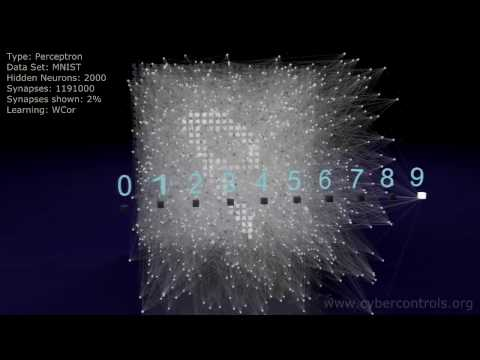

In [19]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('3JQ3hYko51Y')